In [ ]:
'''
    로지스틱 회귀(logistic regression) - 다중분류(multi-class classification)
    - 선형회귀의 선형방정식을 이용해서 분류 알고리즘으로 사용
    - 선형방정식에서 나온 값을 softmax 함수를 총합이 1이 되도록 만든다. (확률값으로 사용된다.)
    - softmax 함수의 동작은 큰 값을 작은 값보다 훨씬 두드러지게 만든다.
    

'''

In [2]:
import numpy as np
import pandas as pd

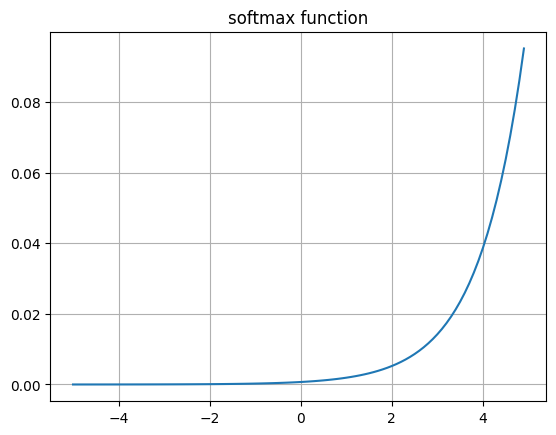

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
x = np.arange(-5,5,0.1)
y = tf.nn.softmax(x)
plt.plot(x, y)
plt.grid()
plt.title("softmax function")
plt.show()


In [5]:
### a1과 a2 비교 했을 때 훨씬 값이 큰 a1이 잘 예측했다고 할 수 있다.
# a1값들이 서로 큰 차이가 없기 때문에 결과는 언제든 달라질 수 있다. ==> ML 입장에서는 안 좋다.
# a2값들은 서로 간의 큰 차이가 있기 때문에 결과가 달라질 확률이 적다. ==> ML 입장에서는 좋다. 
a1 = np.array([0.9, 0.8, 0.7])
a2 = np.array([0.5, 0.2, 0.1]) 
y1 = tf.nn.softmax(a1) #array([0.3671654 , 0.33222499, 0.30060961])
y2 = tf.nn.softmax(a2) #array([0.41474187, 0.30724834, 0.27800979])
y1,y2

(<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.3671654 , 0.33222499, 0.30060961])>,
 <tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.41474187, 0.30724834, 0.27800979])>)

In [6]:
df = pd.read_csv(r"C:\Users\YB\Desktop\tf24_study\csv\fish.csv")
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [7]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### 2. 입력데이터와 label 작성

In [8]:
fish_data = df.iloc[:,1:]
fish_target = df.iloc[:,0]

In [9]:
fish_data.shape, fish_target.shape

((159, 5), (159,))

### 3. 훈련데이터와 테스트 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test=train_test_split(fish_data, fish_target, test_size=0.2, random_state=1,stratify=fish_target)

In [12]:
### 총 159개 중에 127개가 훈련 데이터
X_train.shape,y_train.shape

((127, 5), (127,))

In [13]:
### 총 159개 중에 32개가 테스트 데이터
X_test.shape, y_test.shape

((32, 5), (32,))

### 4. 표준화

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

### 5. 모델 생성

In [16]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression(C=20.0,random_state=42,max_iter=1000) # C 기능은 Ridge의 alpha 와 동일한 기능이다. C는 작을수록 규제 강도가 강해진다.
lr.fit(X_train_scaled,y_train)

LogisticRegression(C=20.0, max_iter=1000, random_state=42)

### 6. 예측

In [21]:
pred = lr.predict(X_test_scaled[:5])
pred # 새 데이터를 넣어줬더니 예측함

array(['Roach', 'Bream', 'Bream', 'Parkki', 'Roach'], dtype=object)

### 7. 평가

In [20]:
lr.score(X_test_scaled,y_test)

0.9375

### 예측된 과정

### 가. label 종류 - 클래스 확인 
* ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'] ,...

In [22]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

### 나. 회귀계수 확인 

In [23]:
fish_data.columns

Index(['Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [24]:
lr.coef_, lr.intercept_ #feature가 5개여서 계수가 5개가 나옴b

(array([[-1.40394383, -1.3414721 ,  1.8863137 ,  8.09992949, -0.22961979],
        [-0.6256055 , -1.71617071, -2.88909505,  6.85654591, -2.51499095],
        [ 3.12683163,  6.91265536, -8.89167541, -7.01939518,  4.93706288],
        [-0.33928302,  3.7102616 ,  4.11234808, -3.76816951, -1.85610618],
        [-1.74474988, -5.94057141,  4.99340529, -1.08908088,  2.46225593],
        [-0.95976895,  1.04248467,  1.30591342, -4.29387054, -5.58960793],
        [ 1.94651954, -2.66718742, -0.51721005,  1.21404072,  2.79100603]]),
 array([ 0.21707804, -0.30582197,  2.82538221, -0.16988213,  2.30981598,
        -7.36622336,  2.48965123]))

### 선형 방정식
* y = w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w0
* y = -1.40394383 * Weight + -1.3414721 * Length + 1.8863137 * Diagonal + 8.09992949 * Height + 8.09992949 * Width + 8.09992949

### 실제 5개의 feature 값을 위의 선형 회귀식에 직접 대입 하지 않고 y값을 구해주는 함수를 사용한다.
* lr.decision_function(데이터)

In [25]:
X_test_scaled[:5]

array([[-0.80311799, -0.71728333, -0.6738959 , -0.68296452, -0.69993802],
       [ 0.5060019 ,  0.29981453,  0.47712474,  1.44669788,  0.6339306 ],
       [ 0.09690193,  0.11488765,  0.29807709,  1.11934743,  0.20430551],
       [-0.38583603, -0.34742956, -0.30727451,  0.45306557, -0.20407759],
       [-0.66947867, -0.43989301, -0.37548314, -0.35865207, -0.38428437]])

In [26]:
y = -1.40394383 * (-0.80311799) + -1.3414721 * (-0.71728333) + 1.8863137 * (-0.6738959) + 8.09992949 * (-0.68296452) + 8.09992949 * (-0.69993802) + 8.09992949
y

-2.28291452227314

In [31]:
decisions = lr.decision_function(X_test_scaled[:5])
decisions

array([[ -4.33559771,   0.45210322,   2.68625841,  -1.45731581,
          3.6274706 ,  -1.37828193,   0.40536322],
       [ 11.57708169,   5.80964951,  -4.7875477 ,  -3.89511197,
          2.01370519, -16.67158953,   5.95381282],
       [  9.50890414,   5.73624633,  -5.57632054,  -3.14780292,
          2.23066034, -12.89851599,   4.14682865],
       [  4.36188056,   5.03927109,  -2.23832795,  -3.92008703,
          2.516671  ,  -8.56406501,   2.80465735],
       [ -1.77800349,   0.46010287,   1.65016508,  -1.0542405 ,
          3.66055978,  -3.98460419,   1.04602045]])

### y값을 softmax 함수에 적용한다.

In [32]:
from scipy.special import softmax

In [33]:
np.round(softmax(decisions,axis=1),3) 

array([[0.   , 0.028, 0.263, 0.004, 0.673, 0.005, 0.027],
       [0.993, 0.003, 0.   , 0.   , 0.   , 0.   , 0.004],
       [0.972, 0.022, 0.   , 0.   , 0.001, 0.   , 0.005],
       [0.299, 0.59 , 0.   , 0.   , 0.047, 0.   , 0.063],
       [0.003, 0.032, 0.106, 0.007, 0.793, 0.   , 0.058]])

### 전체 예측 확률 값으로 보기
* lr.classes_ [Bream, Smelt]

In [35]:
#['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
np.round(lr.predict_proba(X_test_scaled[:5]),3)

array([[0.   , 0.028, 0.263, 0.004, 0.673, 0.005, 0.027],
       [0.993, 0.003, 0.   , 0.   , 0.   , 0.   , 0.004],
       [0.972, 0.022, 0.   , 0.   , 0.001, 0.   , 0.005],
       [0.299, 0.59 , 0.   , 0.   , 0.047, 0.   , 0.063],
       [0.003, 0.032, 0.106, 0.007, 0.793, 0.   , 0.058]])